# WGAN Training

## imports

In [14]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_safari, load_cifar10
from keras.preprocessing.image import ImageDataGenerator



In [15]:
RUN_ID = '0023'
RUN_FOLDER = os.path.join("./run", RUN_ID)
DATA_FOLDER = './data/celeb/'

## data

In [16]:
data_gen = ImageDataGenerator(preprocessing_function=lambda x: (x.astype('float32') - 127.5) / 127.5)

x_train = data_gen.flow_from_directory(DATA_FOLDER
                                         , target_size = (64,64)
                                         , batch_size = 32
                                         , shuffle = True
                                         , class_mode = 'input'
                                         , subset = "training"
                                            )

Found 202599 images belonging to 1 classes.


## architecture

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


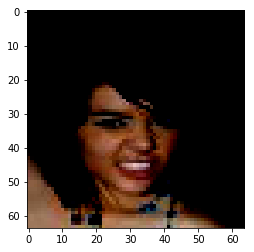

In [17]:
plt.imshow(x_train[0][0][0])

In [5]:
print(np.min(x_train[0][0]))
print(np.max(x_train[0][0]))

-1.0
1.0


In [20]:
#works

gan = WGANGP(input_dim = (64,64,3)
        , critic_conv_filters = [64,64,128,128]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,1]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.00005
        , generator_initial_dense_layer_size = (16, 16, 32)
        , generator_use_upsampling = [True,True, False,False]
        , generator_conv_t_filters = [128,64, 64,3]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [1,1,1,1]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.8
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.00005
        , optimiser = 'rmsprop'
        , z_dim = 100
        )


gan.save(RUN_FOLDER)




In [21]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [22]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 64, 64, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 16, 16, 64)        102464    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 8, 8, 128)         0         
__________

In [23]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_9 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 8192)              0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 16, 16, 32)        0         
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 32, 32, 32)        0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 32, 32, 128)       102528    
__________

## training

In [26]:
d_losses, g_losses, d_accs, g_accs = gan.train(     
    x_train
    , batch_size = 32
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , initial_epoch = 0
    , using_generator = True
)

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 (5, 1) [D loss: (8.5)] [D acc: (0.000)] [G loss: 0.0] [G acc: 0.156]
1 (5, 1) [D loss: (7.5)] [D acc: (0.000)] [G loss: -0.0] [G acc: 0.750]
2 (5, 1) [D loss: (5.8)] [D acc: (0.000)] [G loss: -0.6] [G acc: 1.000]
3 (5, 1) [D loss: (2.6)] [D acc: (0.000)] [G loss: -2.2] [G acc: 0.969]
4 (5, 1) [D loss: (-3.6)] [D acc: (0.000)] [G loss: -6.4] [G acc: 1.000]
5 (5, 1) [D loss: (-4.9)] [D acc: (0.000)] [G loss: -13.8] [G acc: 1.000]
6 (5, 1) [D loss: (-9.0)] [D acc: (0.000)] [G loss: -20.8] [G acc: 1.000]
7 (5, 1) [D loss: (-6.2)] [D acc: (0.000)] [G loss: -23.7] [G acc: 1.000]
8 (5, 1) [D loss: (-13.4)] [D acc: (0.000)] [G loss: -25.1] [G acc: 1.000]
9 (5, 1) [D loss: (-14.5)] [D acc: (0.000)] [G loss: -22.9] [G acc: 1.000]
10 (5, 1) [D loss: (-19.2)] [D acc: (0.000)] [G loss: -18.2] [G acc: 1.000]
11 (5, 1) [D loss: (-23.1)] [D acc: (0.000)] [G loss: -12.0] [G acc: 0.906]
12 (5, 1) [D loss: (-22.5)] [D acc: (0.000)] [G loss: -6.2] [G acc: 0.625]
13 (5, 1) [D loss: (-27.7)] [D acc: (0.00

110 (5, 1) [D loss: (-11.5)] [D acc: (0.000)] [G loss: -5.7] [G acc: 0.781]
111 (5, 1) [D loss: (-15.1)] [D acc: (0.000)] [G loss: 9.8] [G acc: 0.031]
112 (5, 1) [D loss: (-12.2)] [D acc: (0.000)] [G loss: 19.0] [G acc: 0.000]
113 (5, 1) [D loss: (-13.8)] [D acc: (0.000)] [G loss: -10.3] [G acc: 0.906]
114 (5, 1) [D loss: (-13.9)] [D acc: (0.000)] [G loss: 3.7] [G acc: 0.281]
115 (5, 1) [D loss: (-14.5)] [D acc: (0.000)] [G loss: 14.5] [G acc: 0.000]
116 (5, 1) [D loss: (-12.2)] [D acc: (0.000)] [G loss: 13.9] [G acc: 0.031]
117 (5, 1) [D loss: (-9.6)] [D acc: (0.000)] [G loss: 9.2] [G acc: 0.031]
118 (5, 1) [D loss: (-10.8)] [D acc: (0.000)] [G loss: 5.2] [G acc: 0.219]
119 (5, 1) [D loss: (-15.1)] [D acc: (0.000)] [G loss: 7.0] [G acc: 0.188]
120 (5, 1) [D loss: (-10.7)] [D acc: (0.000)] [G loss: 9.8] [G acc: 0.031]
121 (5, 1) [D loss: (-14.1)] [D acc: (0.000)] [G loss: 13.3] [G acc: 0.125]
122 (5, 1) [D loss: (-14.7)] [D acc: (0.000)] [G loss: 14.6] [G acc: 0.000]
123 (5, 1) [D loss

219 (5, 1) [D loss: (-6.7)] [D acc: (0.000)] [G loss: 12.6] [G acc: 0.000]
220 (5, 1) [D loss: (-7.3)] [D acc: (0.000)] [G loss: 13.1] [G acc: 0.000]
221 (5, 1) [D loss: (-8.9)] [D acc: (0.000)] [G loss: 19.8] [G acc: 0.000]
222 (5, 1) [D loss: (-10.3)] [D acc: (0.000)] [G loss: 4.7] [G acc: 0.219]
223 (5, 1) [D loss: (-9.8)] [D acc: (0.000)] [G loss: 20.5] [G acc: 0.000]
224 (5, 1) [D loss: (-7.8)] [D acc: (0.000)] [G loss: 19.1] [G acc: 0.000]
225 (5, 1) [D loss: (-10.0)] [D acc: (0.000)] [G loss: -5.2] [G acc: 0.969]
226 (5, 1) [D loss: (-8.9)] [D acc: (0.000)] [G loss: 41.8] [G acc: 0.000]
227 (5, 1) [D loss: (-8.6)] [D acc: (0.000)] [G loss: -5.0] [G acc: 0.750]
228 (5, 1) [D loss: (-3.6)] [D acc: (0.000)] [G loss: 16.1] [G acc: 0.000]
229 (5, 1) [D loss: (-10.7)] [D acc: (0.000)] [G loss: 36.3] [G acc: 0.000]
230 (5, 1) [D loss: (-6.0)] [D acc: (0.000)] [G loss: 2.5] [G acc: 0.438]
231 (5, 1) [D loss: (-6.8)] [D acc: (0.000)] [G loss: 5.2] [G acc: 0.094]
232 (5, 1) [D loss: (-7.5

329 (5, 1) [D loss: (-7.5)] [D acc: (0.000)] [G loss: 14.0] [G acc: 0.000]
330 (5, 1) [D loss: (-6.9)] [D acc: (0.000)] [G loss: 26.9] [G acc: 0.000]
331 (5, 1) [D loss: (-6.0)] [D acc: (0.000)] [G loss: 17.6] [G acc: 0.000]
332 (5, 1) [D loss: (-8.0)] [D acc: (0.000)] [G loss: 18.0] [G acc: 0.156]
333 (5, 1) [D loss: (-6.5)] [D acc: (0.000)] [G loss: 20.8] [G acc: 0.000]
334 (5, 1) [D loss: (-7.0)] [D acc: (0.000)] [G loss: 59.1] [G acc: 0.000]
335 (5, 1) [D loss: (-6.8)] [D acc: (0.000)] [G loss: 2.3] [G acc: 0.438]
336 (5, 1) [D loss: (-8.6)] [D acc: (0.000)] [G loss: 26.8] [G acc: 0.000]
337 (5, 1) [D loss: (-8.8)] [D acc: (0.000)] [G loss: 25.0] [G acc: 0.000]
338 (5, 1) [D loss: (-8.8)] [D acc: (0.000)] [G loss: -7.3] [G acc: 0.844]
339 (5, 1) [D loss: (-5.8)] [D acc: (0.000)] [G loss: 12.6] [G acc: 0.156]
340 (5, 1) [D loss: (-6.6)] [D acc: (0.000)] [G loss: 7.2] [G acc: 0.156]
341 (5, 1) [D loss: (-6.9)] [D acc: (0.000)] [G loss: 9.0] [G acc: 0.188]
342 (5, 1) [D loss: (-6.1)] 

439 (5, 1) [D loss: (-6.2)] [D acc: (0.000)] [G loss: 27.5] [G acc: 0.000]
440 (5, 1) [D loss: (-6.0)] [D acc: (0.000)] [G loss: 4.1] [G acc: 0.344]
441 (5, 1) [D loss: (-5.9)] [D acc: (0.000)] [G loss: 12.0] [G acc: 0.188]
442 (5, 1) [D loss: (-5.6)] [D acc: (0.000)] [G loss: 16.5] [G acc: 0.000]
443 (5, 1) [D loss: (-7.5)] [D acc: (0.000)] [G loss: 27.1] [G acc: 0.000]
444 (5, 1) [D loss: (-4.0)] [D acc: (0.000)] [G loss: 17.0] [G acc: 0.000]
445 (5, 1) [D loss: (-6.2)] [D acc: (0.000)] [G loss: 24.9] [G acc: 0.000]
446 (5, 1) [D loss: (-8.6)] [D acc: (0.000)] [G loss: 12.0] [G acc: 0.156]
447 (5, 1) [D loss: (-6.1)] [D acc: (0.000)] [G loss: 11.4] [G acc: 0.188]
448 (5, 1) [D loss: (-5.1)] [D acc: (0.000)] [G loss: 1.6] [G acc: 0.406]
449 (5, 1) [D loss: (-6.9)] [D acc: (0.000)] [G loss: 14.1] [G acc: 0.031]
450 (5, 1) [D loss: (-3.7)] [D acc: (0.000)] [G loss: 20.1] [G acc: 0.000]
451 (5, 1) [D loss: (-9.1)] [D acc: (0.000)] [G loss: 4.1] [G acc: 0.375]
452 (5, 1) [D loss: (-5.8)] 

549 (5, 1) [D loss: (-7.8)] [D acc: (0.000)] [G loss: 14.0] [G acc: 0.000]
550 (5, 1) [D loss: (-5.0)] [D acc: (0.000)] [G loss: 6.8] [G acc: 0.250]
551 (5, 1) [D loss: (-4.3)] [D acc: (0.000)] [G loss: 15.0] [G acc: 0.000]
552 (5, 1) [D loss: (-5.0)] [D acc: (0.000)] [G loss: 12.5] [G acc: 0.062]
553 (5, 1) [D loss: (-6.0)] [D acc: (0.000)] [G loss: -1.8] [G acc: 0.688]
554 (5, 1) [D loss: (-4.7)] [D acc: (0.000)] [G loss: 32.8] [G acc: 0.000]
555 (5, 1) [D loss: (-7.2)] [D acc: (0.000)] [G loss: -7.0] [G acc: 0.719]
556 (5, 1) [D loss: (-7.4)] [D acc: (0.000)] [G loss: 17.4] [G acc: 0.156]
557 (5, 1) [D loss: (-6.0)] [D acc: (0.000)] [G loss: 12.2] [G acc: 0.000]
558 (5, 1) [D loss: (-5.6)] [D acc: (0.000)] [G loss: 7.3] [G acc: 0.188]
559 (5, 1) [D loss: (-6.5)] [D acc: (0.000)] [G loss: 13.9] [G acc: 0.188]
560 (5, 1) [D loss: (-4.3)] [D acc: (0.000)] [G loss: 21.8] [G acc: 0.000]
561 (5, 1) [D loss: (-5.9)] [D acc: (0.000)] [G loss: 22.3] [G acc: 0.000]
562 (5, 1) [D loss: (-7.3)]

659 (5, 1) [D loss: (-7.1)] [D acc: (0.000)] [G loss: 19.4] [G acc: 0.000]
660 (5, 1) [D loss: (-4.7)] [D acc: (0.000)] [G loss: 2.0] [G acc: 0.500]
661 (5, 1) [D loss: (-7.2)] [D acc: (0.000)] [G loss: 7.4] [G acc: 0.188]
662 (5, 1) [D loss: (-5.0)] [D acc: (0.000)] [G loss: -1.0] [G acc: 0.500]
663 (5, 1) [D loss: (-5.9)] [D acc: (0.000)] [G loss: 15.6] [G acc: 0.000]
664 (5, 1) [D loss: (-5.7)] [D acc: (0.000)] [G loss: 11.7] [G acc: 0.125]
665 (5, 1) [D loss: (-5.0)] [D acc: (0.000)] [G loss: 12.0] [G acc: 0.000]
666 (5, 1) [D loss: (-5.1)] [D acc: (0.000)] [G loss: 13.7] [G acc: 0.000]
667 (5, 1) [D loss: (-6.2)] [D acc: (0.000)] [G loss: 9.8] [G acc: 0.094]
668 (5, 1) [D loss: (-5.1)] [D acc: (0.000)] [G loss: -0.0] [G acc: 0.500]
669 (5, 1) [D loss: (-6.0)] [D acc: (0.000)] [G loss: 16.0] [G acc: 0.156]
670 (5, 1) [D loss: (-9.3)] [D acc: (0.000)] [G loss: 2.5] [G acc: 0.375]
671 (5, 1) [D loss: (-9.7)] [D acc: (0.000)] [G loss: 6.2] [G acc: 0.438]
672 (5, 1) [D loss: (-1.2)] [D

769 (5, 1) [D loss: (-6.8)] [D acc: (0.000)] [G loss: -10.4] [G acc: 0.875]
770 (5, 1) [D loss: (-6.7)] [D acc: (0.000)] [G loss: -1.3] [G acc: 0.594]
771 (5, 1) [D loss: (-6.6)] [D acc: (0.000)] [G loss: -12.4] [G acc: 1.000]
772 (5, 1) [D loss: (-8.7)] [D acc: (0.000)] [G loss: 0.3] [G acc: 0.531]
773 (5, 1) [D loss: (-6.9)] [D acc: (0.000)] [G loss: 5.5] [G acc: 0.438]
774 (5, 1) [D loss: (-3.8)] [D acc: (0.000)] [G loss: 10.0] [G acc: 0.000]
775 (5, 1) [D loss: (-3.4)] [D acc: (0.000)] [G loss: 2.7] [G acc: 0.531]
776 (5, 1) [D loss: (-8.0)] [D acc: (0.000)] [G loss: -3.4] [G acc: 0.656]
777 (5, 1) [D loss: (-3.7)] [D acc: (0.000)] [G loss: -0.9] [G acc: 0.656]
778 (5, 1) [D loss: (-7.5)] [D acc: (0.000)] [G loss: -11.3] [G acc: 0.844]
779 (5, 1) [D loss: (-3.3)] [D acc: (0.000)] [G loss: -2.3] [G acc: 0.656]
780 (5, 1) [D loss: (-7.5)] [D acc: (0.000)] [G loss: -6.1] [G acc: 0.719]
781 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: 6.1] [G acc: 0.312]
782 (5, 1) [D loss: (-4.5)

879 (5, 1) [D loss: (-7.0)] [D acc: (0.000)] [G loss: -13.0] [G acc: 0.844]
880 (5, 1) [D loss: (-8.2)] [D acc: (0.000)] [G loss: -34.3] [G acc: 1.000]
881 (5, 1) [D loss: (-7.2)] [D acc: (0.000)] [G loss: -16.7] [G acc: 1.000]
882 (5, 1) [D loss: (-4.3)] [D acc: (0.000)] [G loss: -17.8] [G acc: 1.000]
883 (5, 1) [D loss: (-6.5)] [D acc: (0.000)] [G loss: 6.8] [G acc: 0.188]
884 (5, 1) [D loss: (-7.0)] [D acc: (0.000)] [G loss: 1.2] [G acc: 0.438]
885 (5, 1) [D loss: (-4.9)] [D acc: (0.000)] [G loss: 4.5] [G acc: 0.344]
886 (5, 1) [D loss: (-5.5)] [D acc: (0.000)] [G loss: -2.9] [G acc: 0.781]
887 (5, 1) [D loss: (-3.3)] [D acc: (0.000)] [G loss: -19.0] [G acc: 1.000]
888 (5, 1) [D loss: (-8.4)] [D acc: (0.000)] [G loss: -13.7] [G acc: 1.000]
889 (5, 1) [D loss: (-5.7)] [D acc: (0.000)] [G loss: -33.8] [G acc: 1.000]
890 (5, 1) [D loss: (-7.5)] [D acc: (0.000)] [G loss: -29.6] [G acc: 1.000]
891 (5, 1) [D loss: (-5.9)] [D acc: (0.000)] [G loss: -27.1] [G acc: 1.000]
892 (5, 1) [D loss:

988 (5, 1) [D loss: (-6.6)] [D acc: (0.000)] [G loss: -16.8] [G acc: 0.906]
989 (5, 1) [D loss: (-7.8)] [D acc: (0.000)] [G loss: -27.8] [G acc: 0.969]
990 (5, 1) [D loss: (-6.1)] [D acc: (0.000)] [G loss: -21.6] [G acc: 1.000]
991 (5, 1) [D loss: (-5.9)] [D acc: (0.000)] [G loss: -30.3] [G acc: 1.000]
992 (5, 1) [D loss: (-9.3)] [D acc: (0.000)] [G loss: -28.6] [G acc: 0.969]
993 (5, 1) [D loss: (-5.6)] [D acc: (0.000)] [G loss: -30.2] [G acc: 1.000]
994 (5, 1) [D loss: (-3.2)] [D acc: (0.000)] [G loss: -40.9] [G acc: 1.000]
995 (5, 1) [D loss: (-5.9)] [D acc: (0.000)] [G loss: -43.8] [G acc: 1.000]
996 (5, 1) [D loss: (-5.4)] [D acc: (0.000)] [G loss: -34.9] [G acc: 1.000]
997 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -20.5] [G acc: 0.812]
998 (5, 1) [D loss: (-7.8)] [D acc: (0.000)] [G loss: 6.8] [G acc: 0.000]
999 (5, 1) [D loss: (-10.9)] [D acc: (0.000)] [G loss: -3.2] [G acc: 0.656]
1000 (5, 1) [D loss: (-6.1)] [D acc: (0.000)] [G loss: -36.2] [G acc: 1.000]
1001 (5, 1) [

1095 (5, 1) [D loss: (-5.9)] [D acc: (0.000)] [G loss: -31.5] [G acc: 1.000]
1096 (5, 1) [D loss: (-0.5)] [D acc: (0.000)] [G loss: -40.3] [G acc: 1.000]
1097 (5, 1) [D loss: (-9.4)] [D acc: (0.000)] [G loss: -53.1] [G acc: 1.000]
1098 (5, 1) [D loss: (-6.2)] [D acc: (0.000)] [G loss: -56.8] [G acc: 1.000]
1099 (5, 1) [D loss: (-6.3)] [D acc: (0.000)] [G loss: -57.3] [G acc: 1.000]
1100 (5, 1) [D loss: (-6.3)] [D acc: (0.000)] [G loss: -54.9] [G acc: 1.000]
1101 (5, 1) [D loss: (-9.2)] [D acc: (0.000)] [G loss: -41.5] [G acc: 1.000]
1102 (5, 1) [D loss: (-7.3)] [D acc: (0.000)] [G loss: -27.4] [G acc: 1.000]
1103 (5, 1) [D loss: (-6.0)] [D acc: (0.000)] [G loss: -31.0] [G acc: 1.000]
1104 (5, 1) [D loss: (-6.3)] [D acc: (0.000)] [G loss: -18.4] [G acc: 1.000]
1105 (5, 1) [D loss: (-6.3)] [D acc: (0.000)] [G loss: -47.2] [G acc: 1.000]
1106 (5, 1) [D loss: (-8.8)] [D acc: (0.000)] [G loss: -77.0] [G acc: 1.000]
1107 (5, 1) [D loss: (-5.8)] [D acc: (0.000)] [G loss: -73.4] [G acc: 1.000]

1202 (5, 1) [D loss: (-7.2)] [D acc: (0.000)] [G loss: -63.0] [G acc: 1.000]
1203 (5, 1) [D loss: (-5.5)] [D acc: (0.000)] [G loss: -51.8] [G acc: 1.000]
1204 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -42.4] [G acc: 1.000]
1205 (5, 1) [D loss: (-8.5)] [D acc: (0.000)] [G loss: -20.3] [G acc: 0.969]
1206 (5, 1) [D loss: (-8.3)] [D acc: (0.000)] [G loss: -33.1] [G acc: 1.000]
1207 (5, 1) [D loss: (-5.0)] [D acc: (0.000)] [G loss: -62.2] [G acc: 1.000]
1208 (5, 1) [D loss: (-7.1)] [D acc: (0.000)] [G loss: -62.5] [G acc: 1.000]
1209 (5, 1) [D loss: (-8.1)] [D acc: (0.000)] [G loss: -65.3] [G acc: 1.000]
1210 (5, 1) [D loss: (-5.8)] [D acc: (0.000)] [G loss: -37.9] [G acc: 1.000]
1211 (5, 1) [D loss: (-4.6)] [D acc: (0.000)] [G loss: -36.8] [G acc: 1.000]
1212 (5, 1) [D loss: (-5.6)] [D acc: (0.000)] [G loss: -50.5] [G acc: 1.000]
1213 (5, 1) [D loss: (-4.6)] [D acc: (0.000)] [G loss: -40.8] [G acc: 1.000]
1214 (5, 1) [D loss: (-6.1)] [D acc: (0.000)] [G loss: -54.3] [G acc: 1.000]

KeyboardInterrupt: 

In [24]:
idx = np.random.randint(0, x_train.shape[0], 1)[0]
gan.discriminator.predict(np.array([x_train[idx]]))

AttributeError: 'DirectoryIterator' object has no attribute 'shape'

In [ ]:
noise = np.random.normal(0, 1, (1, gan.z_dim))
gen_imgs = gan.generator.predict(noise)
gan.discriminator.predict(np.array([gen_imgs[0]]))

In [ ]:
gan.train_discriminator(x_train, batch_size = 32, clip_threshold = 0.01)

In [ ]:
fake = np.ones((128,1))
noise = np.random.normal(0, 1, (128, 100))
gen_imgs = gan.generator.predict(noise)
gan.discriminator.train_on_batch(gen_imgs, fake)

In [ ]:
[(np.min(x), np.max(x)) for x in gan.discriminator.get_weights()]

In [ ]:
gan.train_generator(batch_size = 128)

In [ ]:
[np.round((np.min(x), np.max(x)), 4) for x in gan.generator.get_weights()]

In [ ]:
plt.imshow(np.clip((x[200]+1)*0.5,0,1))

In [ ]:
gan.discriminator.predict(x)

In [ ]:
plt.plot(g_losses, color='orange', linewidth=1)
plt.plot([x[0] for x in d_losses], color='green', linewidth=1)


In [ ]:
for i in range(100):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

array([74.30898], dtype=float32)

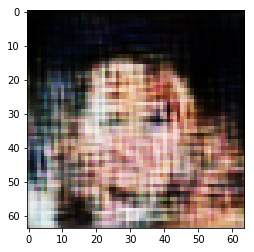

In [37]:
noise = np.random.normal(0, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

plt.imshow(np.clip((img+1)*0.5,0,1))

gan.critic.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.generator.get_weights()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [27]:
gan.model.save_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))